# 3. 趋势突变点
在之前的部分，我们可以发现真实的时间序列数据往往在趋势中存在一些突变点。默认情况下， Prophet 将自动监测到这些点，并对趋势做适当地调整。不过，要是对趋势建模时发生了一些问题，例如：Prophet 不小心忽略了一个趋势速率的变化或者对历史数据趋势变化存在过拟合现象。如果我们希望对趋势的调整过程做更好地控制的话，那么下面将会介绍几种可以使用的方法。

# 3.1 Prophet 中的自动监测突变点

Prophet 首先是通过在**大量**潜在的突变点（变化速率突变）中进行识别来监测突变点的。之后**对趋势变化的幅度做稀疏先验（等同于 L1 正则化）**——实际上 Prophet 在建模时会存在很多变化速率突变的点，但只会尽可能少地使用它们。以 第一部分中佩顿 · 曼宁的数据为例，默认下， Prophet 会识别出 25 个潜在的突变点（均匀分布在在前 80% 的时间序列数据中）。下图中的竖线指出这些潜在的突变点所在的位置。
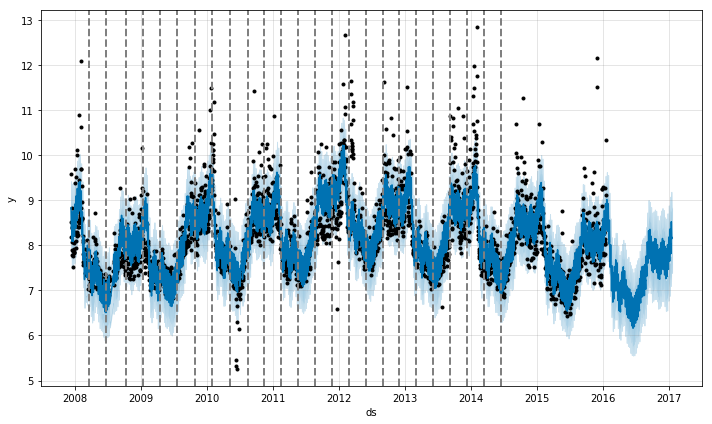

虽然存在很多变化速率可能会突变的点，但由于做了稀疏先验，绝大多数突变点并不会包含在建模过程中。如下图所示，通过观察对每个突变点绘制的速率变化值图，可以发现这一点。
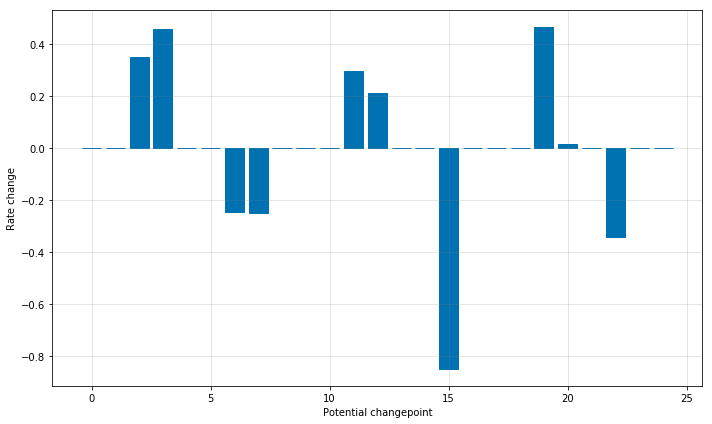
潜在突变点的数量可以通过设置 n_changepoints 参数来指定，但最好还是利用调整正则化过程来修正。

显著的突变点的位置可以通过以下代码获得：

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


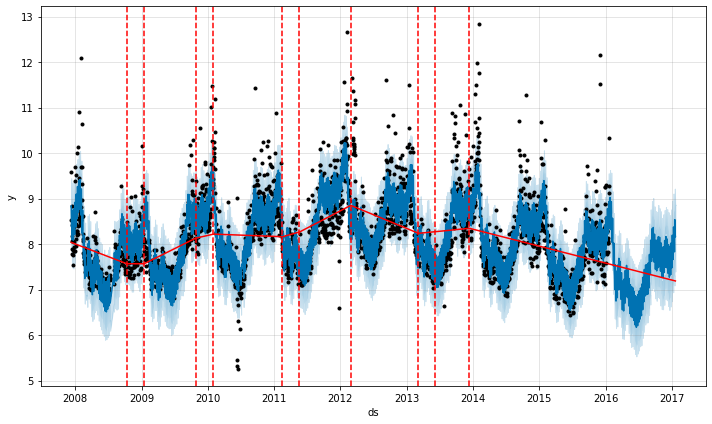

In [5]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

df = pd.read_csv('examples/example_wp_log_peyton_manning.csv')

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

%matplotlib inline

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

默认情况下，只有在时间序列的前80%才会推断出突变点，以便有足够的长度来预测未来的趋势，并避免在时间序列的末尾出现过度拟合的波动。这个默认值可以在很多情况下工作，但不是所有情况下都可以，可以使用**changepoint_range**参数进行更改。例如，Python中的m = Prophet(changepoint_range=0.9)。这意味着将在时间序列的前90%处寻找潜在的变化点。 

# 3.2 调整趋势的灵活性
如果趋势的变化被过度拟合（即过于灵活）或者拟合不足（即灵活性不够），可以利用输入参数 **changepoint_prior_scale** 来调整稀疏先验的程度。默认下，这个参数被指定为 0.05 。

**增加这个值**，会导致趋势拟合得更加灵活。代码和图如下所示：

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


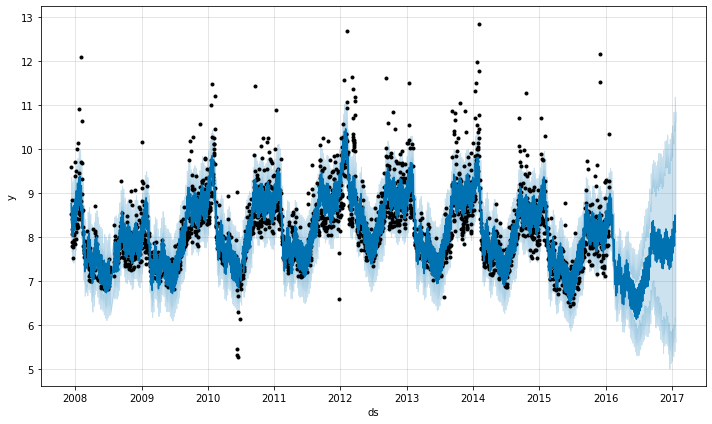

In [3]:
df = pd.read_csv('examples/example_wp_log_peyton_manning.csv')
 
# 拟合模型
m = Prophet(changepoint_prior_scale=0.5)
m.fit(df)
 
future = m.make_future_dataframe(periods=365)
 
forecast = m.predict(future)
fig = m.plot(forecast)

**减少这个值，会导致趋势拟合的灵活性降低，例如下面改成0.01**。

我感觉是拟合的图像更加保守，图像右侧部分能看出差别。

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


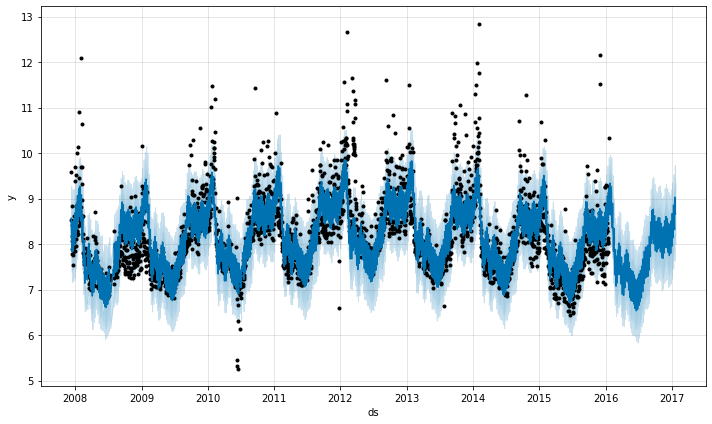

In [4]:
m = Prophet(changepoint_prior_scale=0.001)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
figure001 = m.plot(forecast)

# 3.3 指定突变点的位置

如果你希望手动指定潜在突变点的位置而不是利用自动的突变点监测，可以使用 **changepoints** 参数。

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


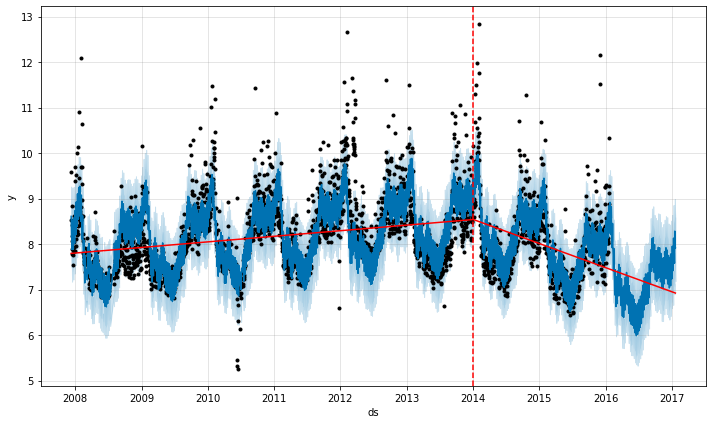

In [11]:
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(changepoints=['2014-01-01'])
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig3 = m.plot(forecast)
b = add_changepoints_to_plot(fig3.gca(), m, forecast)